In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
titanic_data = pd.read_csv('DS6_titanic.csv')

titanic_data

,id,Survived,Pclass,Sex,Age
0,id1,Died,3,male,22.0
1,id2,Survived,1,female,38.0
2,id3,Survived,3,female,26.0
3,id4,Survived,1,female,35.0
4,id5,Died,3,male,35.0
...,...,...,...,...,...
882,id883,Died,2,male,27.0
883,id884,Survived,1,female,19.0
884,id885,Died,3,female,7.0
885,id886,Survived,1,male,26.0


In [37]:
titanic_data = titanic_data.dropna()

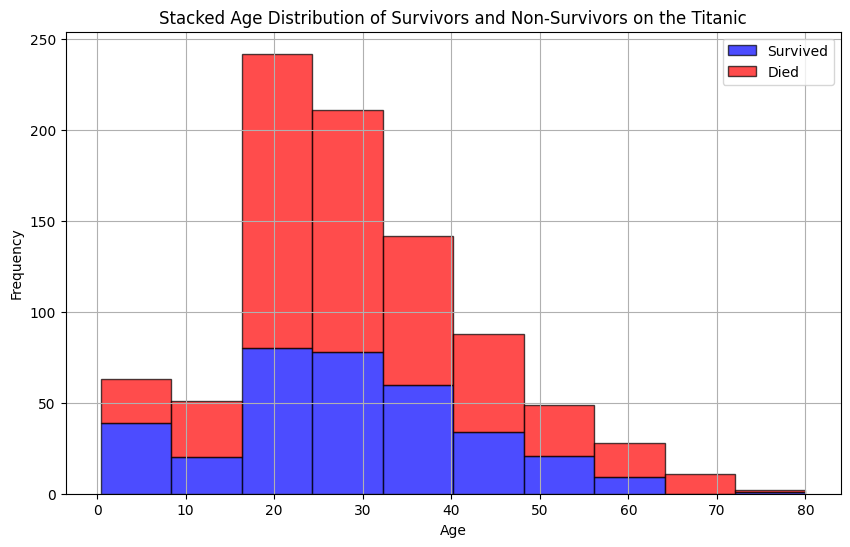

In [38]:
survived = titanic_data[titanic_data['Survived'] == 'Survived']['Age']
not_survived = titanic_data[titanic_data['Survived'] == 'Died']['Age']

plt.figure(figsize=(10, 6))
plt.hist([survived, not_survived], bins=10, alpha=0.7, label=['Survived', 'Died'], color=['blue', 'red'], stacked=True, edgecolor='black')
plt.title('Age Distribution of Survivors and Non-Survivors on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

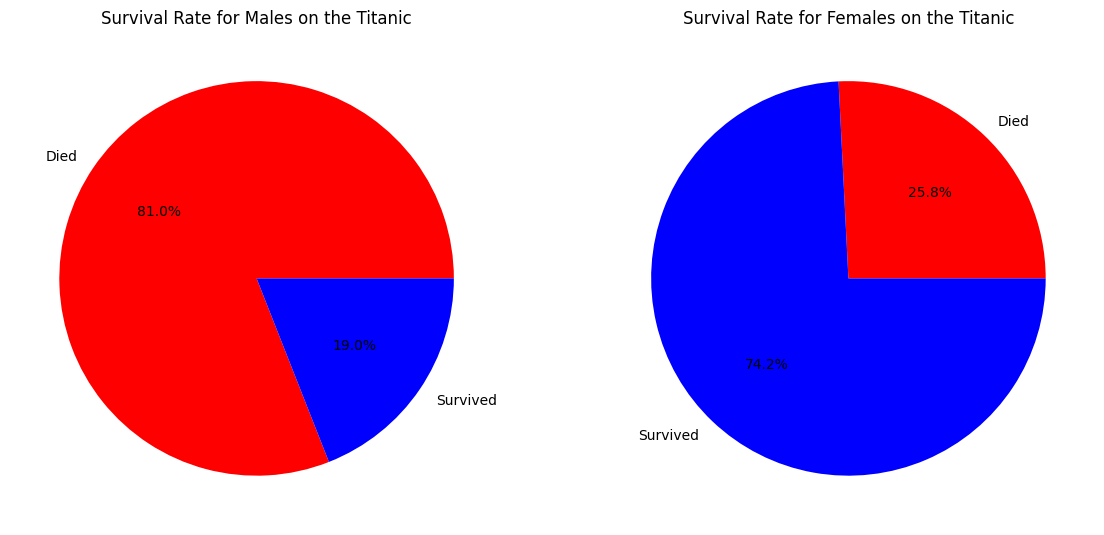

In [39]:
male_data = titanic_data[titanic_data['Sex'] == 'male']
female_data = titanic_data[titanic_data['Sex'] == 'female']

male_counts = male_data['Survived'].value_counts().reindex(['Died', 'Survived'], fill_value=0)
female_counts = female_data['Survived'].value_counts().reindex(['Died', 'Survived'], fill_value=0)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(male_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Survival Rate for Males on the Titanic')

plt.subplot(1, 2, 2)
plt.pie(female_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Survival Rate for Females on the Titanic')

plt.show()

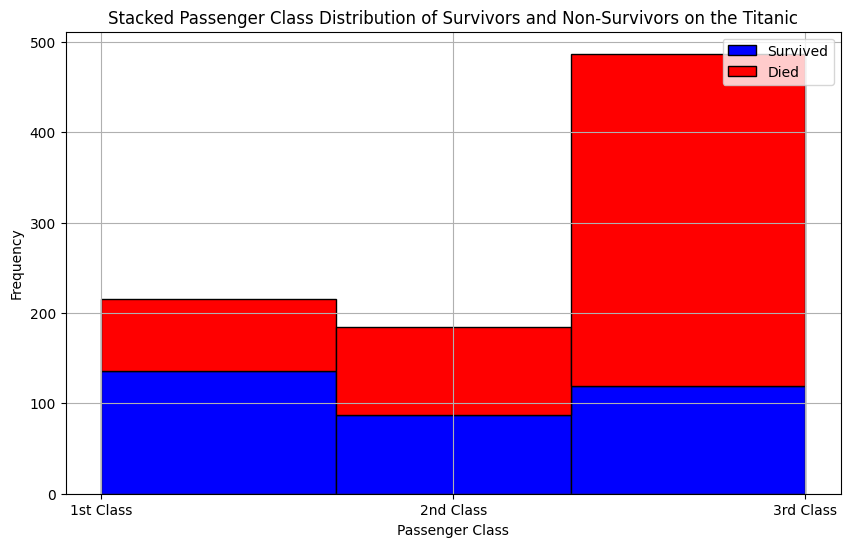

In [40]:
survived = titanic_data[titanic_data['Survived'] == 'Survived']['Pclass']
not_survived = titanic_data[titanic_data['Survived'] == 'Died']['Pclass']


plt.figure(figsize=(10, 6))
plt.hist([survived, not_survived], bins=3, label=['Survived', 'Died'], color=['blue', 'red'], stacked=True, edgecolor='black')
plt.title('Passenger Class Distribution of Survivors and Non-Survivors on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

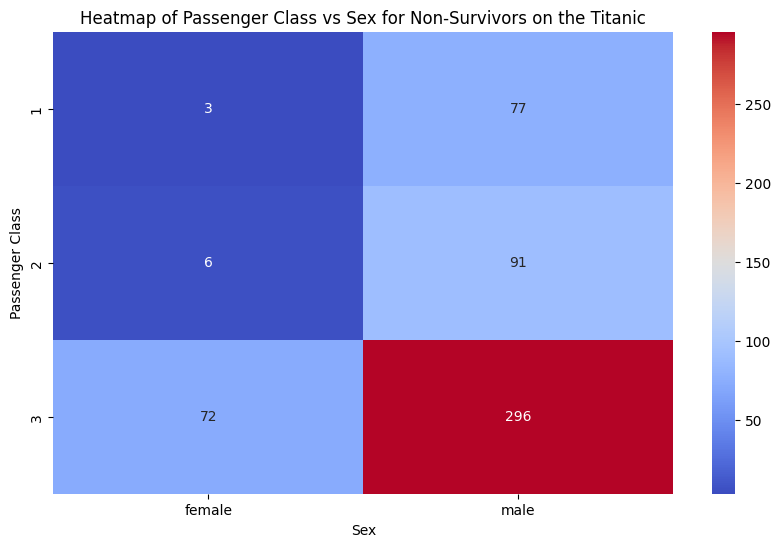

In [45]:
contingency_table = pd.crosstab(index=titanic_data['Pclass'],
                                columns=titanic_data['Sex'],
                                values=titanic_data[titanic_data['Survived'] == 'Died']['Survived'],
                                aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Passenger Class vs Sex for Non-Survivors on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Passenger Class')
plt.show()